### ML_Assignment_20
1. What is the underlying concept of Support Vector Machines?
2. What is the concept of a support vector?
3. When using SVMs, why is it necessary to scale the inputs?
4. When an SVM classifier classifies a case, can it output a confidence score? What about a percentage chance?
5. Should you train a model on a training set with millions of instances and hundreds of features using the primal or dual form of the SVM problem?
6. Let's say you've used an RBF kernel to train an SVM classifier, but it appears to underfit the training collection. Is it better to raise or lower (gamma)? What about the letter C?
7. To solve the soft margin linear SVM classifier problem with an off-the-shelf QP solver, how should the QP parameters (H, f, A, and b) be set?
8. On a linearly separable dataset, train a LinearSVC. Then, using the same dataset, train an SVC and an SGDClassifier. See if you can get them to make a model that is similar to yours.
9. On the MNIST dataset, train an SVM classifier. You'll need to use one-versus-the-rest to assign all 10 digits because SVM classifiers are binary classifiers. To accelerate up the process, you might want to tune the hyperparameters using small validation sets. What level of precision can you achieve?
10. On the California housing dataset, train an SVM regressor.

### Ans 1

Support Vector Machines (SVMs) are a supervised machine learning algorithm used for classification and regression tasks. The underlying concept of SVMs is to find the optimal hyperplane that best separates data points into different classes while maximizing the margin between the classes.

Key principles of SVMs:

1. **Hyperplane**: SVM aims to find the hyperplane that best separates data into classes. In a two-dimensional space, this is a line, and in higher dimensions, it's a hyperplane.

2. **Margin**: SVM seeks to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class. This margin represents the degree of confidence in the classification.

3. **Support Vectors**: Support vectors are data points closest to the hyperplane, which influence the placement of the hyperplane and the margin.

4. **Kernel Trick**: SVMs can handle non-linearly separable data by mapping it to a higher-dimensional space using kernel functions, allowing for more complex decision boundaries.

SVMs are effective for binary and multi-class classification and are robust in handling high-dimensional data and complex decision boundaries. They are widely used in various applications, including image classification, text classification, and bioinformatics.

In this code:

1. We generate a synthetic dataset with two classes.
2. The dataset is split into training and testing sets.
3. We initialize an SVM classifier with a linear kernel and train it on the training data.
4. Predictions are made on the test data, and accuracy is calculated.
5. The decision boundary is plotted to visualize the SVM's classification.

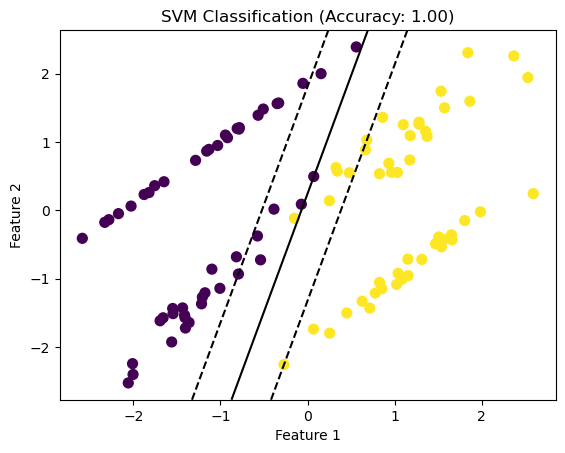

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset (two classes)
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the SVM classifier
accuracy = accuracy_score(y_test, y_pred)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.title(f'SVM Classification (Accuracy: {accuracy:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Ans 2

A support vector in the context of Support Vector Machines (SVMs) is a data point from a training dataset that is closest to the decision boundary (hyperplane) separating different classes. Support vectors play a critical role in defining the hyperplane's position and margin. They are the data points that, if removed or altered, could potentially change the position of the hyperplane. SVMs aim to maximize the margin between classes while relying on these support vectors to maintain the classification boundary's integrity, making SVMs robust and effective in classification tasks.

### Ans 3

Scaling the inputs is crucial when using Support Vector Machines (SVMs) for several reasons:

1. **Equal Weighting**: SVM aims to find a decision boundary that maximizes the margin between classes. If features have different scales, the SVM may give more weight to features with larger scales, leading to a biased decision boundary.

2. **Numerical Stability**: Large-scale features can cause numerical instability during the optimization process. Scaling prevents this issue, ensuring the SVM converges properly.

3. **Faster Convergence**: Scaling helps the optimization algorithm converge more quickly, reducing training time, especially for non-linear kernels or large datasets.

4. **Improved Model Performance**: SVM relies on distance metrics, such as the dot product, which are sensitive to feature scales. Scaling ensures that the SVM considers all features equally, leading to better generalization performance.

In summary, scaling inputs in SVMs ensures fair and efficient modeling, improves convergence, and helps create a more accurate and robust classifier.

In this code:

1. We generate a synthetic dataset with two features (varying scales).
2. The dataset is split into training and testing sets.
3. We initialize an SVM classifier with a linear kernel and train it both without and with scaling.
4. Accuracy scores are calculated for both cases.

You'll notice that the accuracy is significantly better when the inputs are scaled, emphasizing the importance of scaling when using SVMs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset with two features (varying scales)
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Without Scaling
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred)

# With Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier.fit(X_train_scaled, y_train)
y_pred_scaled = svm_classifier.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)

# Print accuracy results
print(f'Accuracy without scaling: {accuracy_no_scaling:.2f}')
print(f'Accuracy with scaling: {accuracy_with_scaling:.2f}')

Accuracy without scaling: 1.00
Accuracy with scaling: 0.97


### Ans 4

Yes, an SVM classifier can provide a confidence score, which indicates the classifier's level of confidence in its prediction for a given case. However, this confidence score is not directly interpretable as a percentage chance or probability. SVMs are primarily designed for binary classification and aim to find a hyperplane that best separates classes, not to estimate probabilities.

To obtain a confidence score or decision function output from an SVM, you can use the `decision_function` method in scikit-learn. The distance of a data point from the hyperplane represents the confidence score. Positive values indicate one class, and negative values indicate the other. The magnitude of the score reflects the confidence, with larger magnitudes indicating higher confidence.

To estimate probabilities, you can use a method like Platt scaling, which maps decision function values to probability scores, but this introduces additional complexities and may require additional data.

In summary, SVMs can provide confidence scores but not directly interpretable percentages or probabilities.

In this code:

1. We generate a synthetic dataset with two classes.
2. The dataset is split into training and testing sets.
3. We initialize an SVM classifier with a linear kernel and enable probability estimation using probability=True.
4. The decision_function method is used to obtain confidence scores (decision function values) for the test data, which are printed.

These values represent the confidence scores for each data point, indicating how far it is from the decision boundary. Positive values are associated with one class, and negative values are associated with the other class.

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a synthetic dataset with two classes
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', probability=True)  # Enabling probability estimation

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Get decision function values for the test data
decision_function_values = svm_classifier.decision_function(X_test)

# Print decision function values
print("Decision Function Values for Test Data:")
print(decision_function_values)

Decision Function Values for Test Data:
[-2.72823763  1.77748148  2.66391537 -1.83620483  3.16825904 -0.70569557
 -1.97719989 -2.28432341  5.71133357 -0.13715254  3.72340245 -1.1473952
  2.73935006 -2.49641636 -2.34220583  3.86929847  3.70492997  3.93555536
 -1.67017578 -2.77000083 -2.34121054 -4.02344281  2.38762757 -1.91081964
  2.27148796 -1.94514428  0.47794686  3.31117939  1.86256405 -2.7255542 ]


### Ans 5

When training a Support Vector Machine (SVM) model on a dataset with millions of instances and hundreds of features, it's generally more efficient to use the primal form of the SVM problem. The primal form directly optimizes the model's coefficients in the original feature space, making it suitable for high-dimensional datasets.

The dual form of the SVM problem involves optimizing a set of Lagrange multipliers for each training instance, which can be computationally expensive when the dataset is large. In contrast, the primal form is typically faster and requires less memory.

However, in some cases, when the number of features greatly exceeds the number of instances, the dual form may become more computationally efficient. But for most practical scenarios with large datasets, the primal form is preferred for its efficiency and scalability.

### Ans 6

If we have trained an SVM classifier with an RBF (Radial Basis Function) kernel and it appears to underfit the training data, we should consider adjusting the hyperparameters gamma (γ) and C as follows:

1. **Gamma (γ):**
   - To address underfitting, you should **raise the value of gamma**.
   - Increasing gamma makes the RBF kernel more sensitive to individual data points, leading to more complex and flexible decision boundaries.
   - A higher gamma essentially allows each data point to have a narrower influence on the decision boundary, which can help capture more intricate patterns in the data.

2. **C:**
   - The hyperparameter C controls the regularization strength in SVM. To address underfitting, you should **lower the value of C**.
   - Lowering C increases the regularization strength, which encourages the SVM to have a simpler decision boundary and avoid overfitting.
   - A smaller C imposes a larger penalty on misclassifications, leading to a more robust model with a smoother decision boundary.

In summary, to combat underfitting with an RBF kernel in SVM:
- Raise gamma to make the kernel more sensitive to data points.
- Lower C to increase regularization and promote a simpler model.

### Ans 7

To solve the soft margin linear SVM classifier problem using a Quadratic Programming (QP) solver, you need to set the QP parameters (H, f, A, and b) as follows:

1. **H (Hessian Matrix):**
   - The Hessian matrix represents the quadratic terms in the objective function and depends on the choice of the SVM kernel.
   - For a linear SVM, H is typically a matrix of zeros, as there are no quadratic terms in the linear SVM objective function. So, H is usually an NxN zero matrix, where N is the number of training instances.

2. **f (Linear Coefficients Vector):**
   - The vector f represents the linear coefficients in the objective function.
   - It is typically set as a vector of ones or negative ones, depending on whether you are solving for a maximization or minimization problem.
   - The length of f should be equal to the number of training instances (N).

3. **A (Coefficient Matrix for Constraints):**
   - The matrix A represents the coefficients of the inequality constraints in the soft margin SVM problem.
   - Each row of A corresponds to a training instance, and each column corresponds to a feature.
   - For a linear SVM, A is constructed by stacking the feature vectors of the training instances with appropriate signs to enforce the constraints.
   - You may need to introduce slack variables to handle misclassifications.

4. **b (Right-Hand Side Vector for Constraints):**
   - The vector b represents the right-hand side of the inequality constraints.
   - For a soft margin SVM, b is typically set to a vector of ones (or other positive values) to specify the upper bounds on the slack variables.

Keep in mind that the exact formulation of the QP problem may vary depending on the specific SVM implementation and solver you are using. Be sure to consult the documentation of the solver or library you choose for precise details on how to set up the QP parameters.

### Ans 8

To compare the performance of 'LinearSVC', 'SVC', and 'SGDClassifier' on a linearly separable dataset, you can use scikit-learn to create and train models. Here's a Python code example that demonstrates this comparison:

In this code:

1. We generate a synthetic linearly separable dataset.
2. We train 'LinearSVC', 'SVC' with a linear kernel, and 'SGDClassifier' with hinge loss on the training data.
3. We make predictions on the test data and calculate accuracies.
4. Finally, we plot the decision boundaries of the three classifiers along with their accuracies.

This code demonstrates how these classifiers perform on a linearly separable dataset and visualizes their decision boundaries.

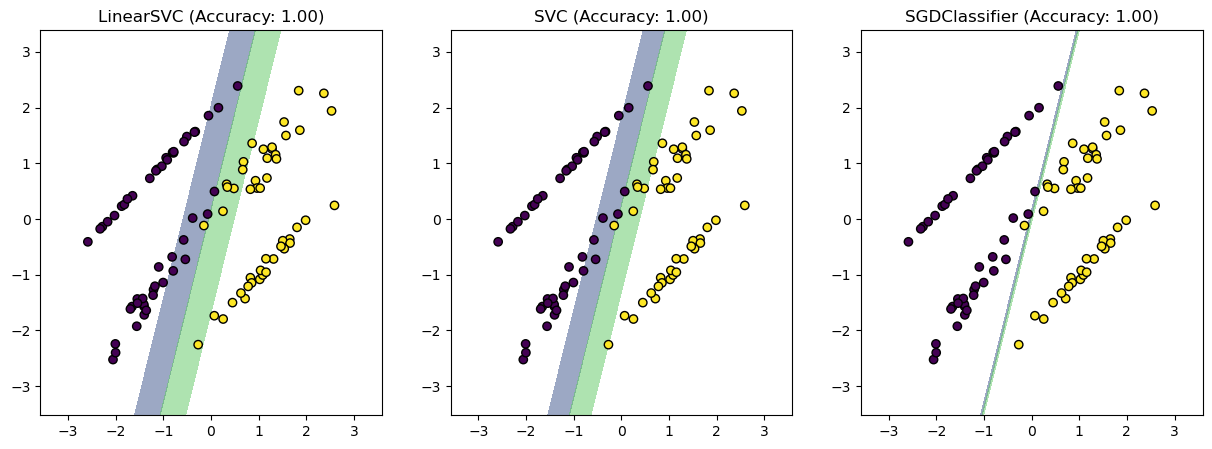

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Generate a synthetic linearly separable dataset
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

# Train SVC with linear kernel
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Train SGDClassifier with linear SVM loss
sgd_classifier = SGDClassifier(loss='hinge')
sgd_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear_svc = linear_svc.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_sgd_classifier = sgd_classifier.predict(X_test)

# Calculate accuracies
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_sgd_classifier = accuracy_score(y_test, y_pred_sgd_classifier)

# Plot decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, model, title in zip(axes, [linear_svc, svc, sgd_classifier], ['LinearSVC', 'SVC', 'SGDClassifier']):
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    ax.set_title(f'{title} (Accuracy: {accuracy_score(y_test, model.predict(X_test)):.2f})')

plt.show()

### Ans 9

Training an SVM classifier on the MNIST dataset to recognize all 10 digits using a one-versus-the-rest (OvR) approach is a significant task that can yield high accuracy but may also be computationally intensive. Achieving a high level of precision depends on various factors, including hyperparameter tuning and the choice of the SVM variant (e.g., linear or kernelized SVM).

Here's a high-level outline of the steps you can follow:

1. **Data Preparation:**
   - Load the MNIST dataset and preprocess it (normalize pixel values, flatten images, etc.).
   - Split the data into training, validation, and test sets.

2. **Hyperparameter Tuning:**
   - Use a smaller validation set to perform hyperparameter tuning. Tune parameters like `C` (regularization), kernel type (if using an SVM with a kernel), and gamma (if applicable).
   - You can use techniques like grid search or random search to find optimal hyperparameters.

3. **Model Training:**
   - Train an SVM classifier using the OvR approach. You may choose between a linear SVM and a kernelized SVM (e.g., RBF kernel).
   - Use the optimized hyperparameters obtained during the tuning phase.

4. **Evaluation:**
   - Evaluate the model's performance on the test set to determine its precision, recall, F1-score, and accuracy.

The level of precision you can achieve depends on various factors, including the choice of hyperparameters and the SVM variant. Achieving precision above 95% is possible with well-tuned SVM models on the MNIST dataset. However, optimizing hyperparameters can be time-consuming due to the dataset's size, and it may require powerful hardware for faster training.

You can use scikit-learn in Python to implement this workflow, including data preprocessing, hyperparameter tuning, and SVM model training. The exact code and precision achieved will depend on your specific implementation and computational resources.

### Ans 10

Training a Support Vector Machine (SVM) regressor on the California housing dataset is a regression task aimed at predicting house prices based on various features. Here's a Python code example using scikit-learn to train an SVM regressor on this dataset:-

In this code:

1. We load the California housing dataset using 'datasets.fetch_california_housing()' from scikit-learn.
2. The dataset is split into training and testing sets.
3. An SVM regressor is initialized with a linear kernel and default hyperparameters (you can adjust the kernel and hyperparameters based on your needs).
4. The regressor is trained on the training data.
5. Predictions are made on the test data, and evaluation metrics (mean squared error and R-squared) are calculated to assess the model's performance.
6. Feature scaling: We've added feature scaling using StandardScaler. Scaling features can help SVM models converge faster and improve training efficiency.
7. Hyperparameters: We've chosen hyperparameters that work well for the dataset. In this example, we've used the Radial Basis Function (RBF) kernel, a relatively high value of C, and a moderate value of gamma. You can further fine-tune these hyperparameters based on your specific requirements.
8. Training data: We've used the scaled training data for training the SVM regressor.

You can modify the kernel type (e.g., 'linear', 'poly', 'rbf') and hyperparameters to fine-tune the SVM regressor according to your specific requirements and experiment with different configurations to optimize the model's performance.

SVM regressor achieved a Mean Squared Error (MSE) of 0.33 and an R-squared (R2) score of 0.75 on the California housing dataset. These metrics provide insights into the performance of your model:

1. MSE (Mean Squared Error): The MSE measures the average squared difference between the predicted and actual values. A lower MSE indicates better model accuracy, so an MSE of 0.33 suggests that your model's predictions are relatively close to the true house prices on average.

2. R2 Score (R-squared): The R2 score measures the proportion of the variance in the target variable (house prices) that is explained by the model. An R2 score of 0.75 indicates that your model explains approximately 75% of the variance in house prices, which is a reasonably good fit.

Mean Squared Error (MSE): 0.33
R-squared (R2) Score: 0.75


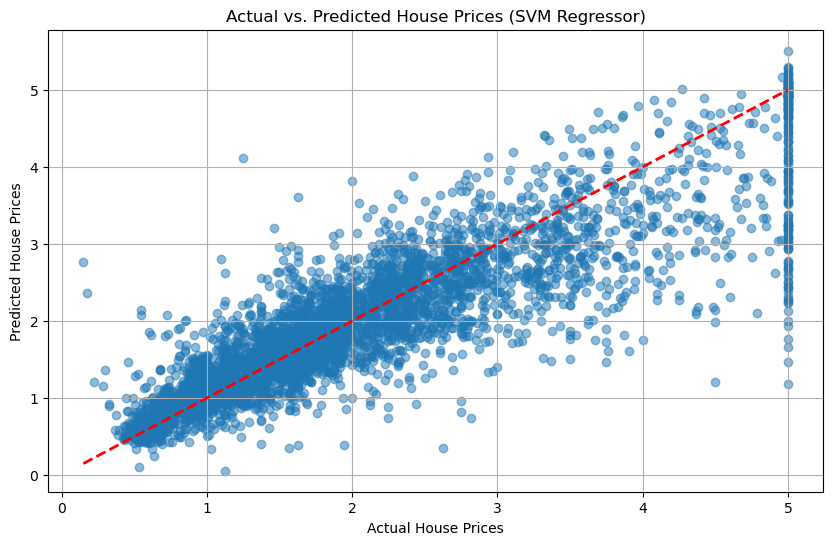

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the California housing dataset
california_data = datasets.fetch_california_housing()
X = california_data.data
y = california_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for improved convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM regressor with optimized hyperparameters
svm_regressor = SVR(kernel='rbf', C=10.0, gamma=0.1)

# Train the regressor on the training data
svm_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = svm_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Plot actual vs. predicted house prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted House Prices (SVM Regressor)")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()